In [25]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## Gerando o conjunto de dados

In [26]:
seed = 13
np.random.seed(seed)

In [27]:
N = 11

x = np.linspace(0, 1, N).reshape(N, 1)

y = -1 + 2*x

w = np.sqrt(0.05)*np.random.randn(N, 1)

y_noisy = y + w

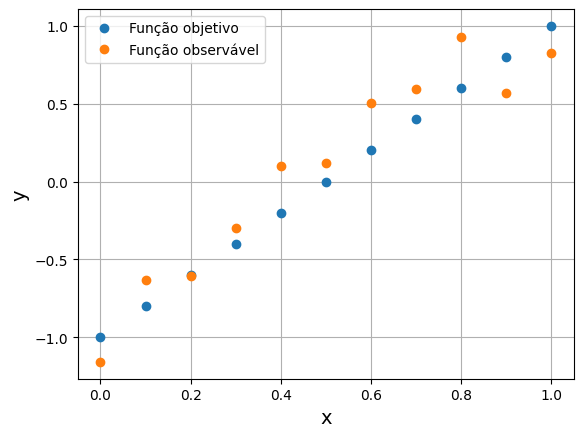

In [28]:
plt.plot(x, y, 'o', label='Função objetivo')
plt.plot(x, y_noisy, 'o', label='Função observável')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

### Criando um conjunto de validação.

In [29]:
x_val = np.linspace(0, 1, N).reshape(N, 1) + 0.05

x_val[0] -= 0.04
x_val[10] -= 0.06

y_val = -1 + 2*x_val

w_val = np.sqrt(0.05)*np.random.randn(N, 1)

y_noisy_val = y_val + w_val

## Regressão com polinômio de ordem 1 (i.e., reta)

In [30]:
degree = 1

# Use pipeline to perform these steps in sequence
pipe_seq1 = [
    ('poly', PolynomialFeatures(degree=degree)),
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
]

pipe1 = Pipeline(pipe_seq1)

# train the model using x and y
pipe1.fit(x, y_noisy.ravel())

# predict output for x
y_pred1 = pipe1.predict(x)

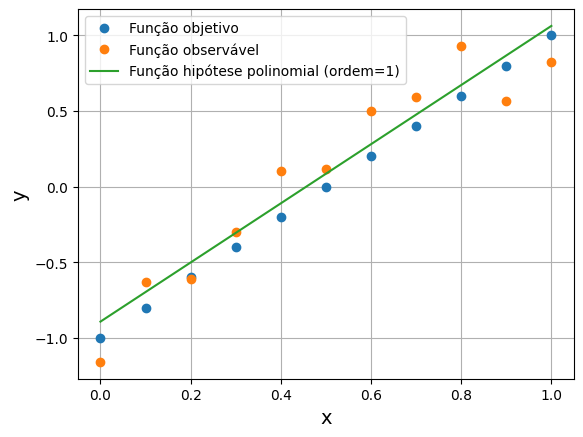

In [31]:
plt.plot(x, y, 'o', label='Função objetivo')
plt.plot(x, y_noisy, 'o', label='Função observável')
plt.plot(x, y_pred1, label='Função hipótese polinomial (ordem=1)')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

### Calculando os erros de treinamento e validação.

In [32]:
y_pred_train = pipe1.predict(x)

mse_train = mean_squared_error(y_noisy, y_pred_train)

y_pred_val = pipe1.predict(x_val)

mse_val = mean_squared_error(y_noisy_val, y_pred_val)

print('MSE train:', mse_train)
print('MSE val:', mse_val)

MSE train: 0.03730788461027028
MSE val: 0.0440380699095589


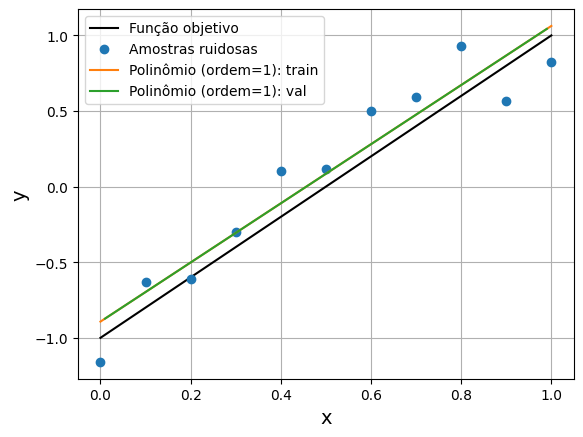

In [33]:
plt.plot(x, y, 'k', label='Função objetivo')
plt.plot(x, y_noisy, 'o', label='Amostras ruidosas')
plt.plot(x, y_pred_train, label='Polinômio (ordem=1): train')
plt.plot(x_val, y_pred_val, label='Polinômio (ordem=1): val')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

### Generalizando

In [34]:
N = 1000

x_new = np.linspace(0, 1, N).reshape(N, 1)

# Predict output for x
y_pred_new = pipe1.predict(x_new)

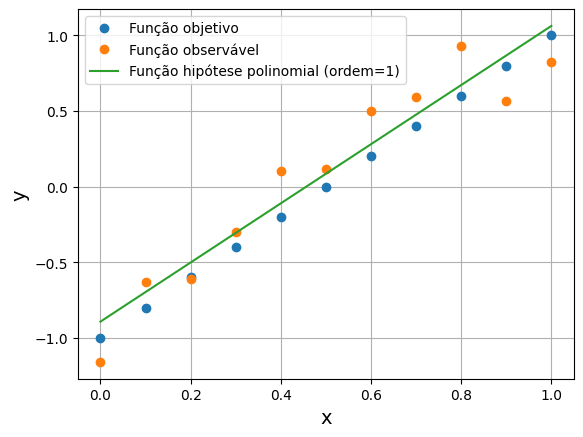

In [35]:
plt.plot(x, y, 'o', label='Função objetivo')
plt.plot(x, y_noisy, 'o', label='Função observável')
plt.plot(x_new, y_pred_new, label='Função hipótese polinomial (ordem=1)')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

## Regressão com polinômio de ordem 11 (mesmo número de amostras)

In [36]:
degree = 11

# Use pipeline to perform these steps in sequence
pipe_seq11 = [
    ('poly', PolynomialFeatures(degree=degree)),
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
]

pipe11 = Pipeline(pipe_seq11)

# train the model using X and y
pipe11.fit(x, y_noisy.ravel())

# predict output for X
y_pred11 = pipe11.predict(x)

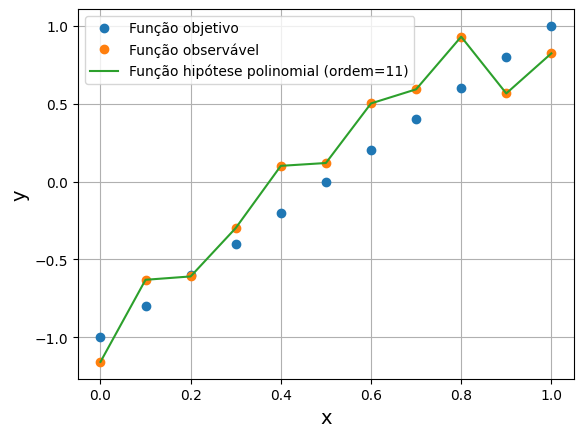

In [37]:
plt.plot(x, y, 'o', label='Função objetivo')
plt.plot(x, y_noisy, 'o', label='Função observável')
plt.plot(x, y_pred11, label='Função hipótese polinomial (ordem=11)')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

### Calculando os erros de treinamento e validação.

In [38]:
y_pred_train = pipe11.predict(x)

mse_train = mean_squared_error(y_noisy, y_pred_train)

y_pred_val = pipe11.predict(x_val)

mse_val = mean_squared_error(y_noisy_val, y_pred_val)

print('MSE train:', mse_train)
print('MSE val:', mse_val)

MSE train: 9.54986594334292e-22
MSE val: 1.1403063899675203


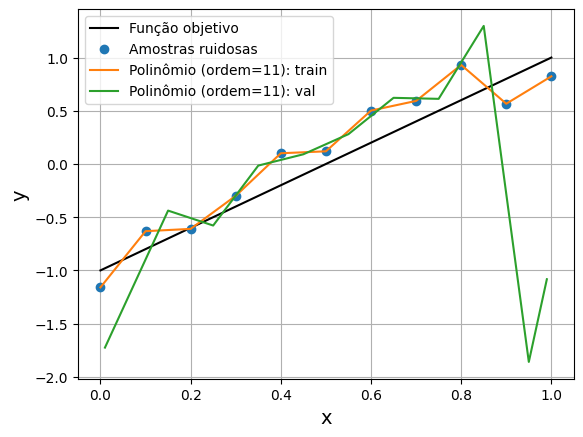

In [39]:
plt.plot(x, y, 'k', label='Função objetivo')
plt.plot(x, y_noisy, 'o', label='Amostras ruidosas')
plt.plot(x, y_pred_train, label='Polinômio (ordem=11): train')
plt.plot(x_val, y_pred_val, label='Polinômio (ordem=11): val')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

### Generalizando

In [40]:
N = 1000

x_new = np.linspace(0, 1, N).reshape(N, 1)

# Predict output for x
y_pred_new = pipe11.predict(x_new)

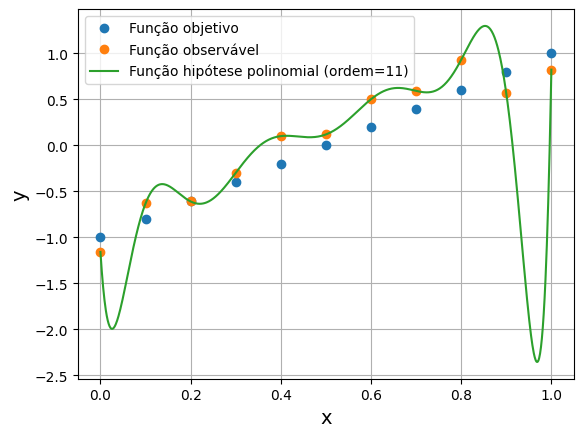

In [41]:
plt.plot(x, y, 'o', label='Função objetivo')
plt.plot(x, y_noisy, 'o', label='Função observável')
plt.plot(x_new, y_pred_new, label='Função hipótese polinomial (ordem=11)')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

## Variando o ruído adicionado ao conjunto de treinamento onde o modelo é mais complexo do que o necessário.

Percebam que o modelo (i.e., a função hipótese) varia, ou seja, assume formatos diferentes, de acordo com o conjunto de treinamento.

Na verdade, as amostras da função objetivo são as mesmas, o que está mudando é apenas o ruído sendo adicionado a essas amostras.

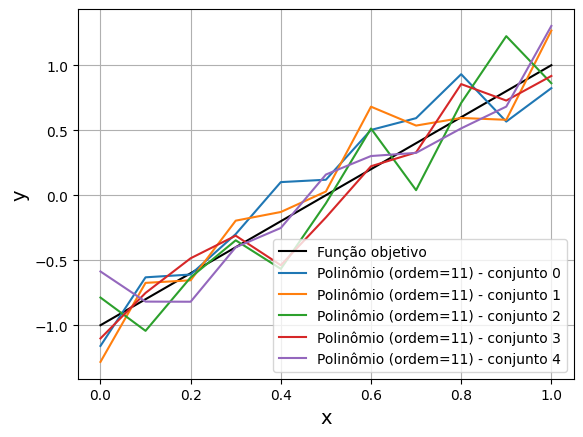

In [42]:
np.random.seed(seed)

degree = 11

# Use pipeline to perform these steps in sequence
pipe_seq11 = [
    ('poly', PolynomialFeatures(degree=degree)),
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
]

pipe11 = Pipeline(pipe_seq11)

N = 11

x = np.linspace(0, 1, N).reshape(N, 1)

y = -1 + 2*x

plt.figure()
plt.plot(x, y, 'k', label='Função objetivo')
for i in range(5):

  w = np.sqrt(0.05)*np.random.randn(N, 1)

  y_noisy = y + w

  # train the model using X and y
  pipe11.fit(x, y_noisy.ravel())

  # predict output for X
  y_pred11 = pipe11.predict(x)

  #plt.plot(x, y_noisy, 'o', label='Dados ruidosos')
  plt.plot(x, y_pred11, label='Polinômio (ordem=11) - conjunto '+str(i))

plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

## Variando o ruído adicionado ao conjunto de treinamento onde o modelo tem a complexidade apropriada.

Percebam que o modelo (i.e., a função hipótese) não varia tanto como no exemplo anterior quando se varia o ruído adicionado às amostras.

Um modelo que apresente flexibilidade ideal terá baixa variância, ou seja, ele sempre tenderá a capturar o padrão geral por trás das amostras, mesmo que ruidosas.

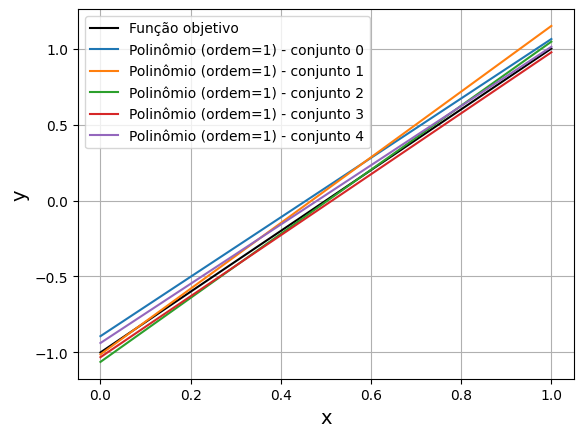

In [43]:
np.random.seed(seed)

degree = 1

# Use pipeline to perform these steps in sequence
pipe_seq11 = [
    ('poly', PolynomialFeatures(degree=degree)),
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
]

pipe1 = Pipeline(pipe_seq1)

N = 11

x = np.linspace(0, 1, N).reshape(N, 1)

y = -1 + 2*x

plt.figure()
plt.plot(x, y, 'k', label='Função objetivo')
for i in range(5):

  w = np.sqrt(0.05)*np.random.randn(N, 1)

  y_noisy = y + w

  # train the model using X and y
  pipe1.fit(x, y_noisy.ravel())

  # predict output for X
  y_pred1 = pipe1.predict(x)

  #plt.plot(x, y_noisy, 'o', label='Dados ruidosos')
  plt.plot(x, y_pred1, label='Polinômio (ordem=1) - conjunto '+str(i))

plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()